In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [28]:
diamondx=pd.read_excel('PricingOfDiamonds.xlsx')
diamondx

,ID,carat,cut,colour,clarity,depth,price,x,y,P,PC
0,1,0.23,Ideal,E,SI2,61.5,326,1417.391304,5.300813,Negative,Negative
1,2,0.21,Premium,E,SI1,59.8,326,1552.380952,5.451505,Positive,Negative
2,3,0.23,Good,E,VS1,56.9,327,1421.739130,5.746924,Positve,Negative
3,4,0.29,Premium,I,VS2,62.4,334,1151.724138,5.352564,NR,Negative
4,5,0.31,Good,J,SI2,63.3,335,1080.645161,5.292259,NR,Negative
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,2757,3829.166667,45.345395,NR,SN
53936,53937,0.72,Good,D,SI1,63.1,2757,3829.166667,43.692552,SP,SN
53937,53938,0.70,Very Good,D,SI1,62.8,2757,3938.571429,43.901274,SN,SN
53938,53939,0.86,Premium,H,SI2,61.0,2757,3205.813953,45.196721,SN,SP


In [29]:
diamondx.head(10)

,ID,carat,cut,colour,clarity,depth,price,x,y,P,PC
0,1,0.23,Ideal,E,SI2,61.5,326,1417.391304,5.300813,Negative,Negative
1,2,0.21,Premium,E,SI1,59.8,326,1552.380952,5.451505,Positive,Negative
2,3,0.23,Good,E,VS1,56.9,327,1421.739130,5.746924,Positve,Negative
3,4,0.29,Premium,I,VS2,62.4,334,1151.724138,5.352564,NR,Negative
4,5,0.31,Good,J,SI2,63.3,335,1080.645161,5.292259,NR,Negative
5,6,0.24,Very Good,J,VVS2,62.8,336,1400.000000,5.350318,SP,Negative
6,7,0.24,Very Good,I,VVS1,62.3,336,1400.000000,5.393258,SN,Negative
7,8,0.26,Very Good,H,SI1,61.9,337,1296.153846,5.444265,SN,Negative
8,9,0.22,Fair,E,VS2,65.1,337,1531.818182,5.176651,Negative,Negative
9,10,0.23,Very Good,H,VS1,59.4,338,1469.565217,5.690236,Negative,Negative


In [30]:
diamondx.tail(10)

,ID,carat,cut,colour,clarity,depth,price,x,y,P,PC
53930,53931,0.71,Premium,E,SI1,60.5,2756,3881.690141,45.553719,Negative,Positve
53931,53932,0.71,Premium,F,SI1,59.8,2756,3881.690141,46.086957,SN,SN
53932,53933,0.70,Very Good,E,VS2,60.5,2757,3938.571429,45.570248,SN,SN
53933,53934,0.70,Very Good,E,VS2,61.2,2757,3938.571429,45.049020,Positve,SN
53934,53935,0.72,Premium,D,SI1,62.7,2757,3829.166667,43.971292,NR,SN
53935,53936,0.72,Ideal,D,SI1,60.8,2757,3829.166667,45.345395,NR,SN
53936,53937,0.72,Good,D,SI1,63.1,2757,3829.166667,43.692552,SP,SN
53937,53938,0.70,Very Good,D,SI1,62.8,2757,3938.571429,43.901274,SN,SN
53938,53939,0.86,Premium,H,SI2,61.0,2757,3205.813953,45.196721,SN,SP
53939,53940,0.75,Ideal,D,SI2,62.2,2757,3676.000000,44.324759,Negative,SP


DEALING WITH MISSING VALUES

In [31]:
missingData=diamondx.isnull().sum()
missingData

ID          0
carat       0
cut         0
colour      0
clarity     0
depth       0
price       0
x           0
y           0
P          10
PC         10
dtype: int64

<Axes: >

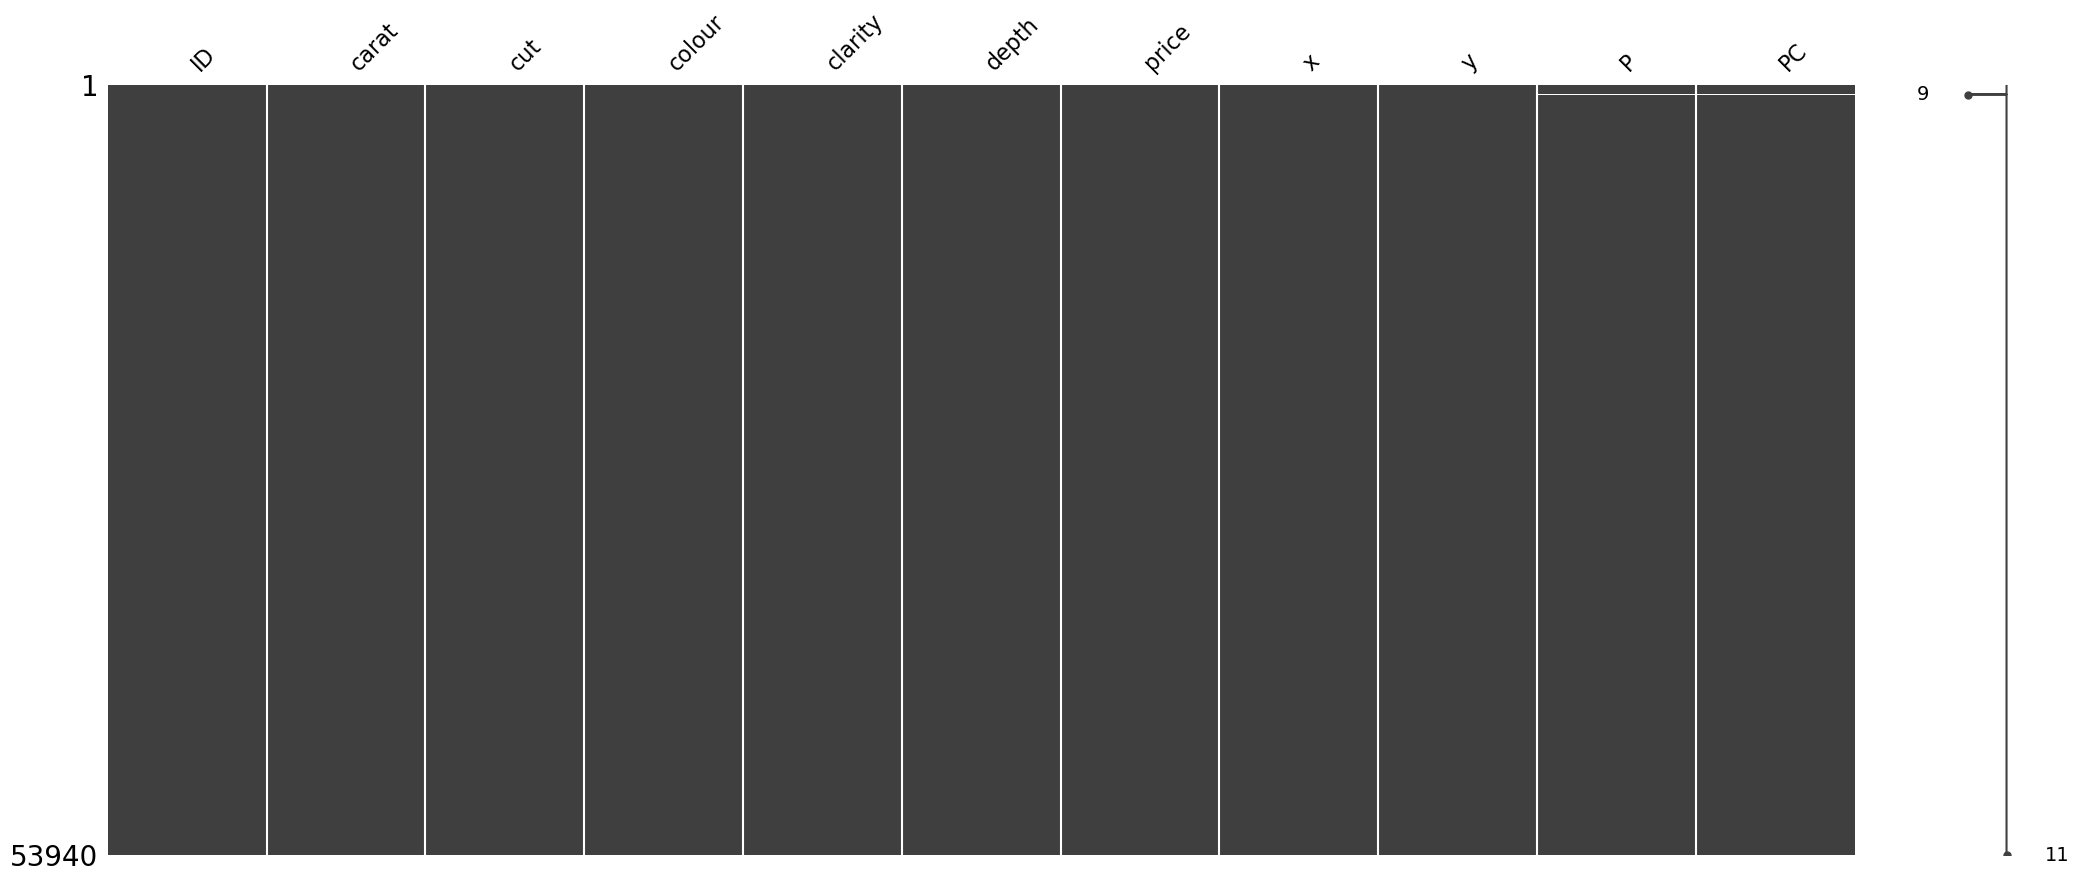

In [32]:
msno.matrix(diamondx)

In [33]:
#removing column of ID
diamondx=diamondx.drop(columns=["ID"])

REMOVING MISSING VALUES
Dropping
Imputation(mean,mode,  )

In [34]:
#getting all continuous values
contData=diamondx.select_dtypes(exclude='object')
#contData=diamondx.select_dtypes(include='int64','float64')
contData

,carat,depth,price,x,y
0,0.23,61.5,326,1417.391304,5.300813
1,0.21,59.8,326,1552.380952,5.451505
2,0.23,56.9,327,1421.739130,5.746924
3,0.29,62.4,334,1151.724138,5.352564
4,0.31,63.3,335,1080.645161,5.292259
...,...,...,...,...,...
53935,0.72,60.8,2757,3829.166667,45.345395
53936,0.72,63.1,2757,3829.166667,43.692552
53937,0.70,62.8,2757,3938.571429,43.901274
53938,0.86,61.0,2757,3205.813953,45.196721


VISUALIZATION OF CONT PLOTS

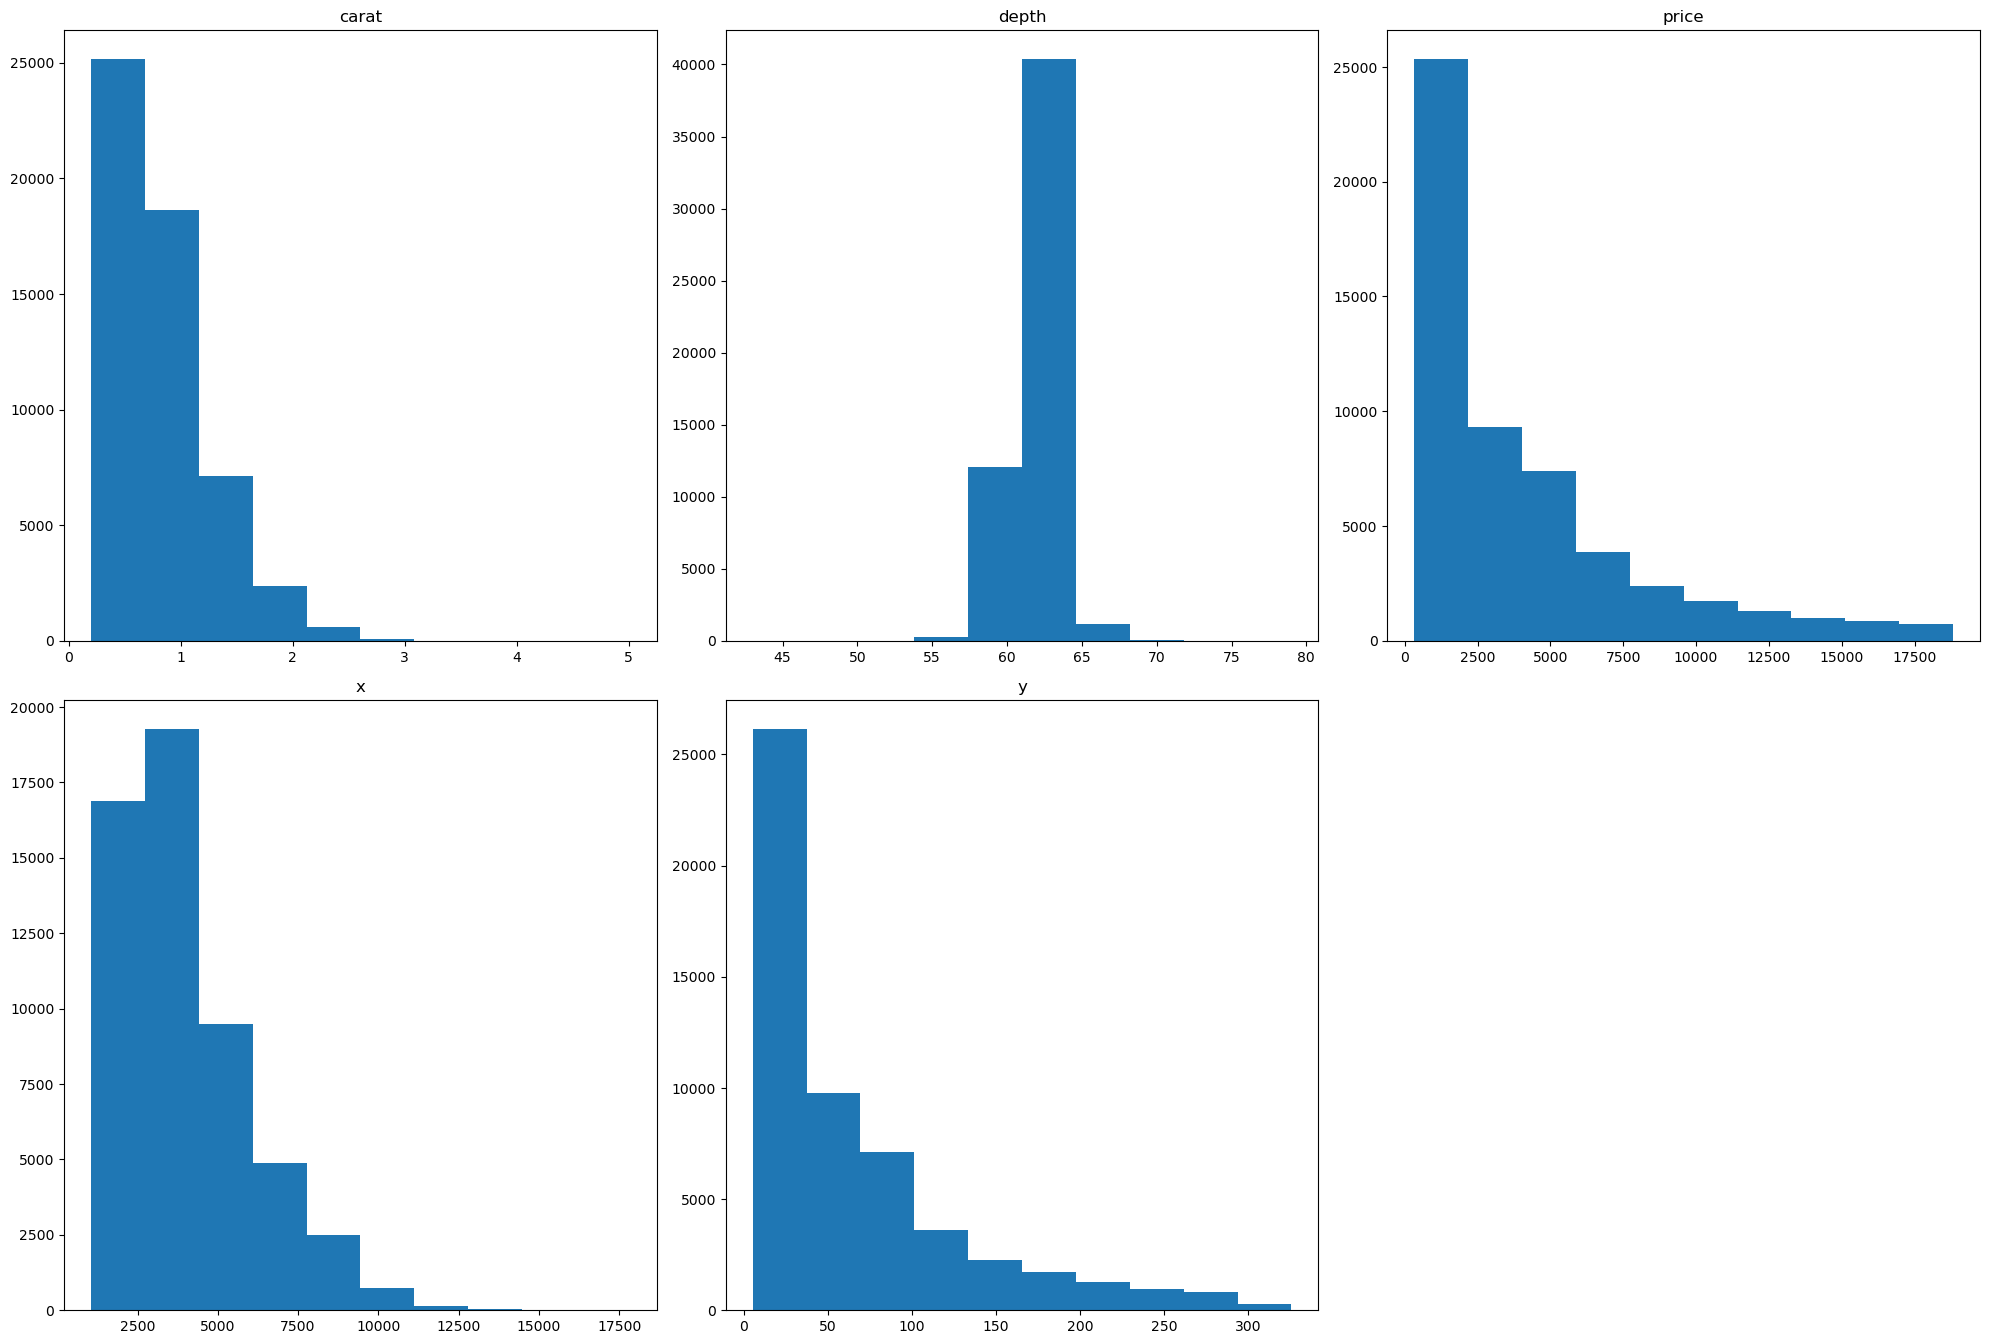

In [35]:
plt.figure(figsize=(20,20))
for i, col in enumerate(contData.columns):
    plt.subplot(3,3,i+1)
    plt.hist(diamondx[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [36]:
#for skewed data
diamondx['carat']=diamondx['carat'].fillna(diamondx['carat'].median())
#for normalized data
diamondx['depth']=diamondx['depth'].fillna(diamondx['depth'].mean())

In [37]:
diamondx['P']=diamondx['P'].fillna(diamondx['P'].mode()[0])
diamondx['PC']=diamondx['PC'].fillna(diamondx['PC'].mode()[0])

In [38]:
missingData=diamondx.isnull().sum()
missingData

carat      0
cut        0
colour     0
clarity    0
depth      0
price      0
x          0
y          0
P          0
PC         0
dtype: int64

OUTLIERS

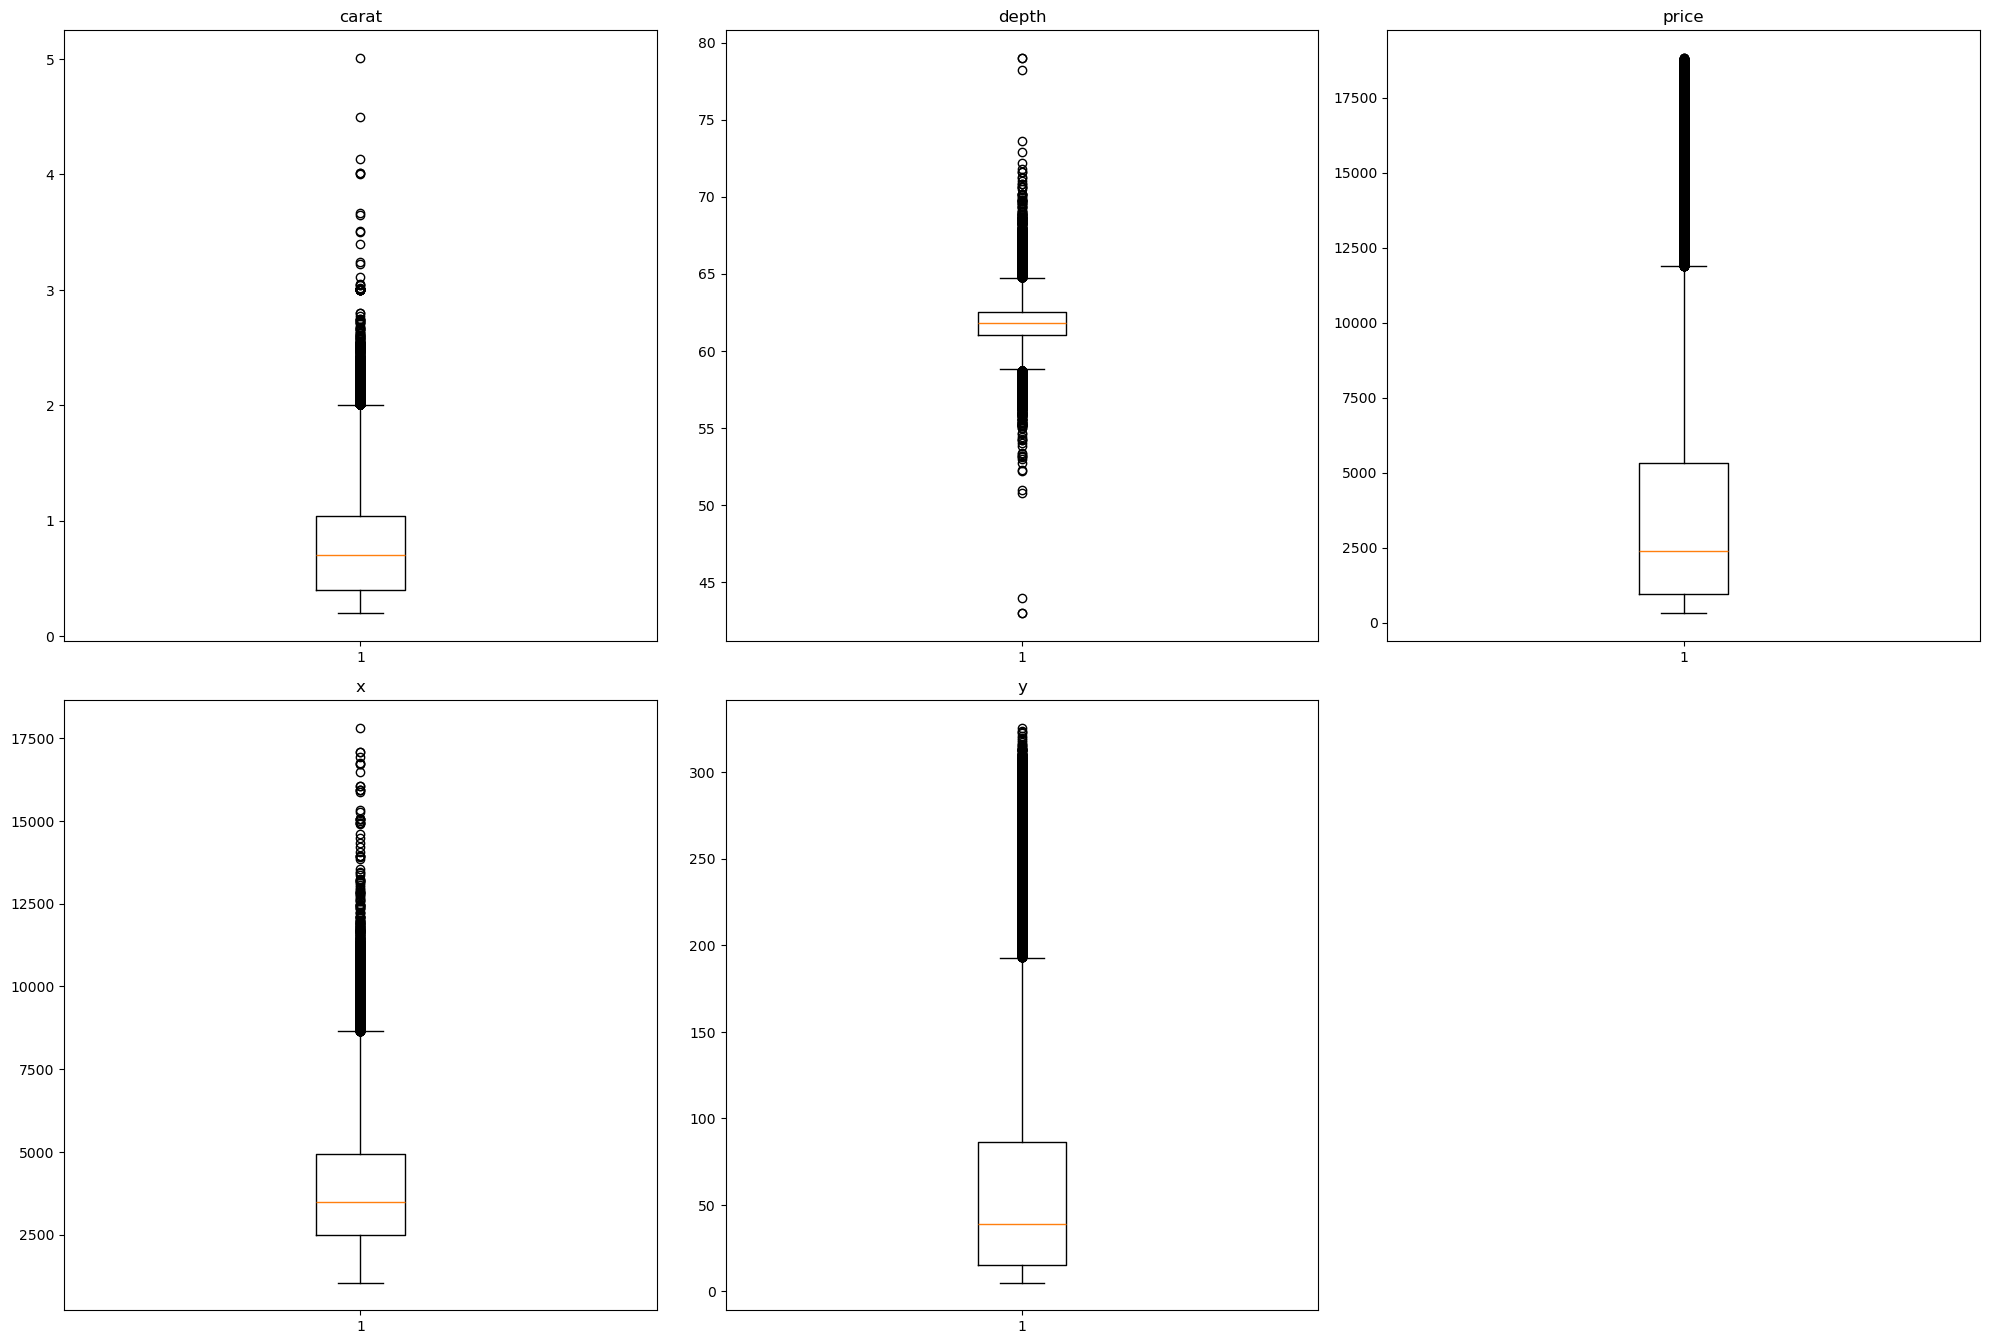

In [39]:
plt.figure(figsize=(20,20))
for i, col in enumerate(contData.columns):
    plt.subplot(3,3,i+1)
    plt.boxplot(diamondx[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [40]:
#using IQR
def removing_outliers(columns):
    for i in columns:
        lower_quantile=diamondx[i].quantile(.25)
        upper_quantile=diamondx[i].quantile(.75)

        IQR=upper_quantile-lower_quantile

        upper_boundary=upper_quantile+1.5*IQR
        lower_boundary=lower_quantile-1.5*IQR

        diamondx[i]=np.where(diamondx[i]>upper_boundary,upper_boundary,diamondx[i])
        diamondx[i]=np.where(diamondx[i]<lower_boundary,lower_boundary,diamondx[i])

In [41]:
removing_outliers(contData)

In [42]:
def boxplotting(contData):
    plt.figure(figsize=(20,20))
    for i, col in enumerate(contData.columns):
        plt.subplot(3,3,i+1)
        plt.boxplot(diamondx[col])
        plt.title(col)
    plt.tight_layout()
    plt.show()

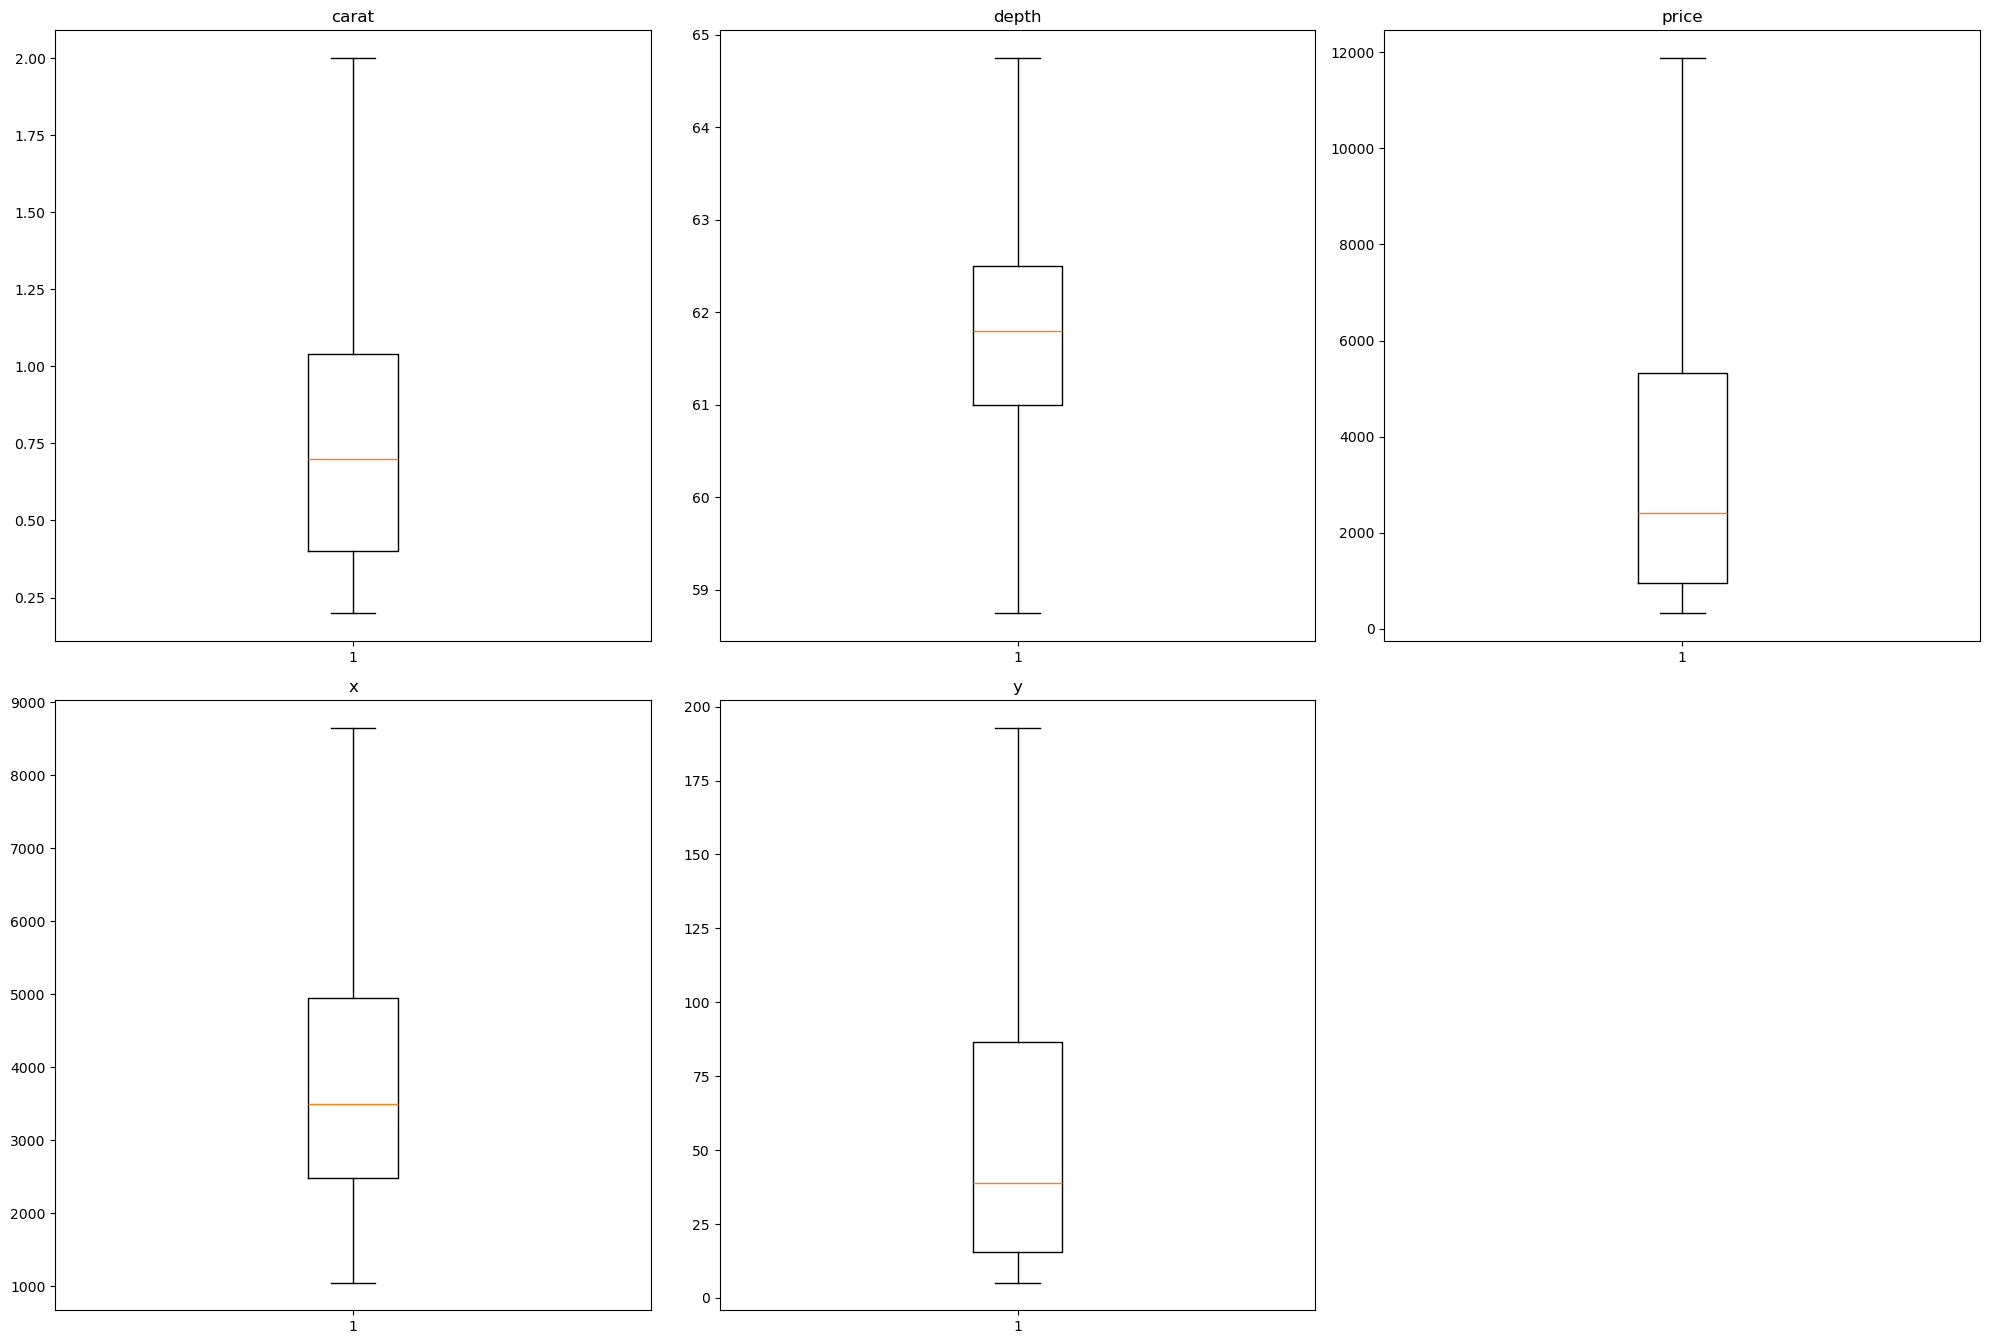

In [43]:
boxplotting(contData)

RELATIONSHIPS

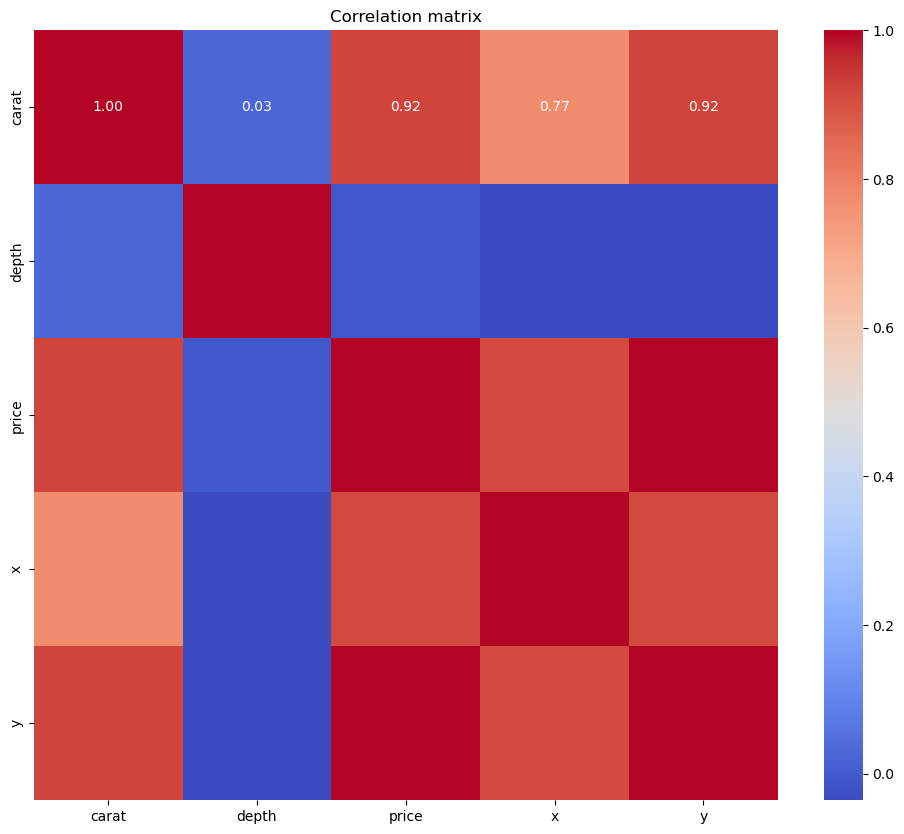

In [44]:
##CONTINUOUS TO CONTINUOUS
#Using a correlation matrix
corr_matrix=contData.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation matrix')
plt.show()



<Axes: xlabel='carat', ylabel='price'>

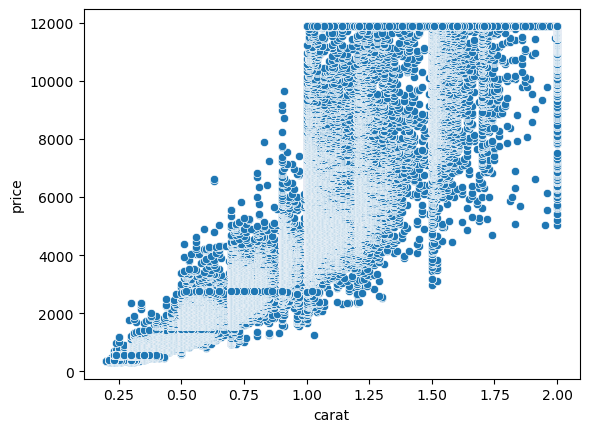

In [45]:
sns.scatterplot(diamondx,x='carat',y='price')

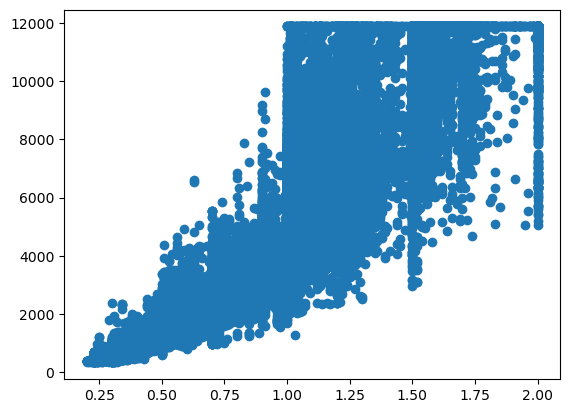

In [46]:
plt.scatter(x=diamondx['carat'],y=diamondx['price'])

Correlated predictors in the continuous data are  [carat,x and y]

CONTINUOUS TO CATEGORICAL

In [47]:
def combined_boxplots(data,var1,var2):
    sns.boxplot(x=data[var1],y=data[var2])
    plt.xlabel(f"{var1}")
    plt.ylabel(f"{var2}")
    plt.title(f"Boxplot for {var1} vs {var2}")
    plt.show()

def AnovaTest(data, cont_var,cat_var):
    groupData=[group[cont_var].values for _, group in data.groupby(cat_var)]
    f_statistics, p_value=f_oneway(*groupData)
    if p_value>0.05:
        print(f"{cat_var} is not correlated with {cont_var}")
    elif p_value<0.05:
        print(f"{cat_var} is corrlated with {cont_var}")

Grouping for categorical data

In [48]:
catData=diamondx.select_dtypes(include=["object"]).columns
catData

Index(['cut', 'colour', 'clarity', 'P', 'PC'], dtype='object')

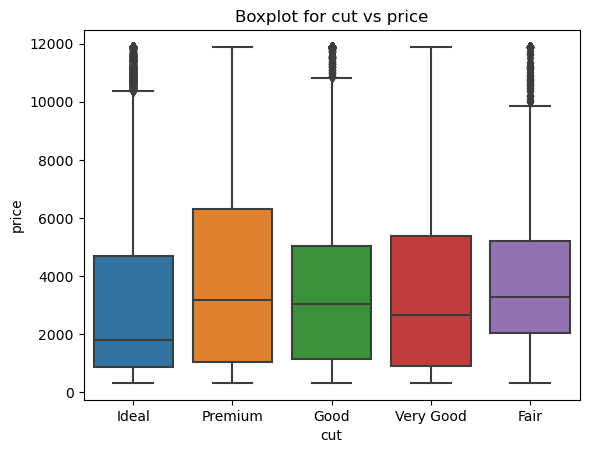

cut is corrlated with price


<Figure size 640x480 with 0 Axes>

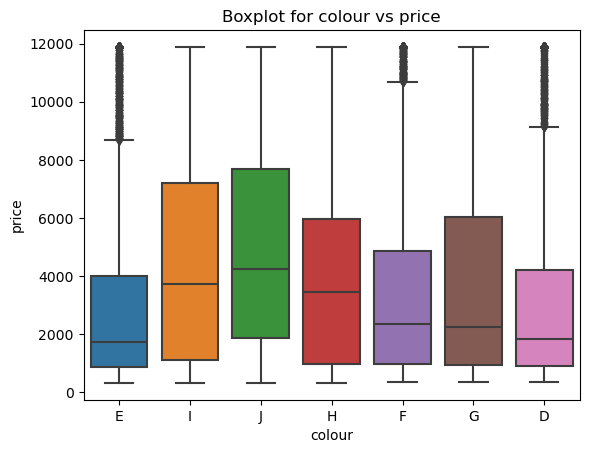

colour is corrlated with price


<Figure size 640x480 with 0 Axes>

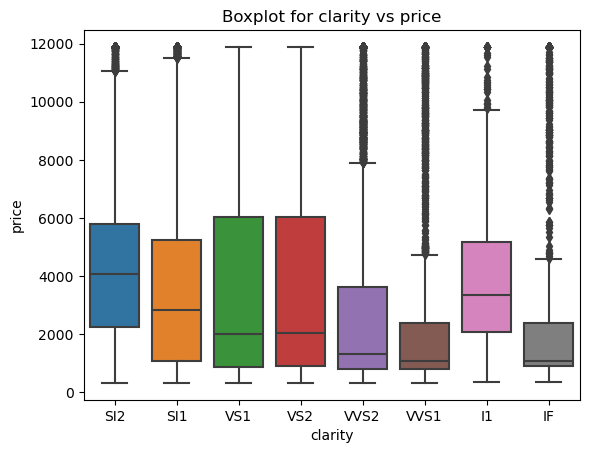

clarity is corrlated with price


<Figure size 640x480 with 0 Axes>

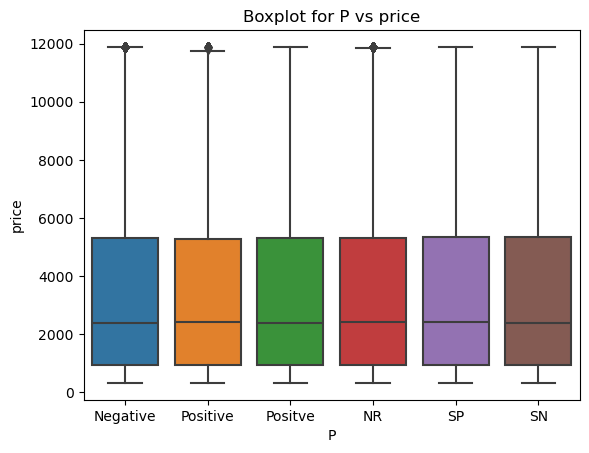

P is not correlated with price


<Figure size 640x480 with 0 Axes>

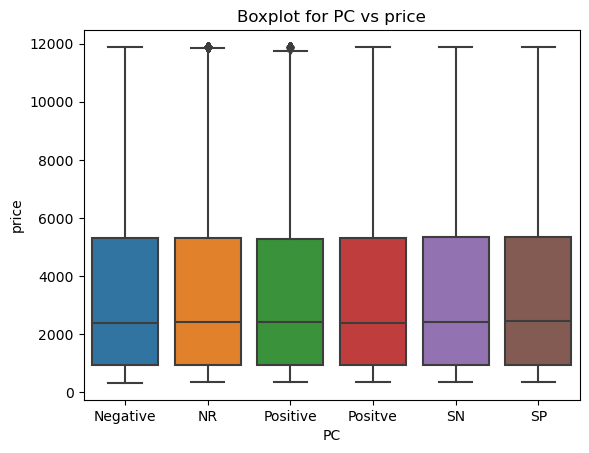

PC is not correlated with price


<Figure size 640x480 with 0 Axes>

In [49]:
for i in catData:
    combined_boxplots(diamondx, i , "price")
    AnovaTest(diamondx,"price",i)
    plt.tight_layout()
    plt.show()

Categorical values that are correlated are [cut, colour and clarity]

MODELS ,  PREDICTIONS AND TESTING

In [59]:
diamondx.columns

Index(['carat', 'cut', 'colour', 'clarity', 'depth', 'price', 'x', 'y', 'P',
       'PC'],
      dtype='object')

In [70]:
predictors= diamondx[["cut","colour","clarity","carat","x","y"]]
predictors.head()

,cut,colour,clarity,carat,x,y
0,Ideal,E,SI2,0.23,1417.391304,5.300813
1,Premium,E,SI1,0.21,1552.380952,5.451505
2,Good,E,VS1,0.23,1421.739130,5.746924
3,Premium,I,VS2,0.29,1151.724138,5.352564
4,Good,J,SI2,0.31,1080.645161,5.292259


CONVERTING CATEGORICAL DATA TO CONTINUOUS DATA

In [71]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
label_encoder=LabelEncoder()
predictors["cut"]=label_encoder.fit_transform(predictors["cut"])
predictors["colour"]=label_encoder.fit_transform(predictors["colour"])
predictors["clarity"]=label_encoder.fit_transform(predictors["clarity"])


In [72]:
predictors.head()

,cut,colour,clarity,carat,x,y
0,2,1,3,0.23,1417.391304,5.300813
1,3,1,2,0.21,1552.380952,5.451505
2,1,1,4,0.23,1421.739130,5.746924
3,3,5,5,0.29,1151.724138,5.352564
4,1,6,3,0.31,1080.645161,5.292259


In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error , mean_squared_log_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


USING LINEAR REGRESSION

In [81]:
##assigning predictors and variables
X,y =predictors,diamondx["price"]

##splitting the testing and training
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

##creating a model
linear_model=LinearRegression()
linear_model.fit(X_train,y_train)

#predicting
y_prediction=linear_model.predict(X_test)

##evaluate the model
mse= mean_squared_error(y_test,y_prediction)
r2=r2_score(y_test,y_prediction)
msle=mean_squared_log_error(y_test,y_prediction)

print(f" Accuracy: {r2} \n Mean Square Error: {mse} \n Mean Square log error: {msle}")


 Accuracy: 0.9992237350759261 
 Mean Square Error: 9092.053321742927 
 Mean Square log error: 0.0007664314520694703


USING KNN

In [82]:
##assigning predictors and variables
X,y =predictors,diamondx["price"]

##splitting the testing and training
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

##creating a model
linear_model=KNeighborsRegressor(n_neighbors=3)
linear_model.fit(X_train,y_train)

#predicting
y_prediction=linear_model.predict(X_test)

##evaluate the model
mse= mean_squared_error(y_test,y_prediction)
r2=r2_score(y_test,y_prediction)
msle=mean_squared_log_error(y_test,y_prediction)

print(f" Accuracy: {r2} \n Mean Square Error: {mse} \n Mean Square log error: {msle}")


 Accuracy: 0.9982753371956261 
 Mean Square Error: 20200.22506891016 
 Mean Square log error: 0.0017569697344262131


USING SUPPORT VECTOR MACHINE


In [84]:

##creating a model
svm_model=SVR()
svm_model.fit(X_train,y_train)

#predicting
y_prediction=svm_model.predict(X_test)

##evaluate the model
mse= mean_squared_error(y_test,y_prediction)
r2=r2_score(y_test,y_prediction)
msle=mean_squared_log_error(y_test,y_prediction)

print(f" Accuracy: {r2} \n Mean Square Error: {mse} \n Mean Square log error: {msle}")


 Accuracy: 0.8218003974506773 
 Mean Square Error: 2087174.4143595265 
 Mean Square log error: 0.09730261660006569


USING RANDOM FOREST REGRESSOR

In [86]:

##creating a model
random_forest_model=RandomForestRegressor()
random_forest_model.fit(X_train,y_train)

#predicting
y_prediction=random_forest_model.predict(X_test)

##evaluate the model
mse= mean_squared_error(y_test,y_prediction)
r2=r2_score(y_test,y_prediction)
msle=mean_squared_log_error(y_test,y_prediction)

print(f" Accuracy: {r2} \n Mean Square Error: {mse} \n Mean Square log error: {msle}")


 Accuracy: 0.9995665124454925 
 Mean Square Error: 5077.251126083194 
 Mean Square log error: 0.0002350079075331375


SAVING THE MODEL